# تمرین ۵: ارزیابی شباهت تصویر (قسمت الف)

### Importing libraries and setting figs size

In [1]:
import math
from random import randrange

import cv2
import numpy as np
import matplotlib.pyplot as plt

fig_w = 15
fig_h = 8

### Defining MSE function

In [2]:
def MSE(img_x, img_y):
    return ((img_x - img_y) ** 2).sum() / (img_x.shape[0] * img_y.shape[1])

طبق تعریف فرمول این تابع می توان نتیجه گرفت حداقل مقدار خروجی صفر و حداکثر ۲۵۵*۲۵۵ می باشد. عدد کمتر به معنای شباهت بیشتر است

### Defining PSNR function

In [3]:
def PSNR(img_x, img_y):
    mse = MSE(img_x, img_y)
    if mse == 0:
        return math.inf
    return 10 * np.log((255 ** 2) / mse)

مطابق فرمول مقادیر این تابع بین مثبت بینهایت و صفر می باشد. عدد بیشتر به معنای شباهت بالاتر است

### Definig random noise function

In [4]:
def random_255(img, n):
    ret = img.copy()
    for i in range(n):
        y = randrange(img.shape[0])
        x = randrange(img.shape[1])
        ret[y][x] = 255
    return ret

با استفاده از این تابع می توان با مشخص کردن تصویر ورودی و تعداد نقاط به صورت رندوم، تعدادی از نقاط تصویر را سفید کرد و خروجی را بازگرداند

### Reading original image

In [5]:
camera_man = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)

### Comparing the image with itselft

In [6]:
print("MSE:")
print(MSE(camera_man, camera_man))
print("PSNR:")
print(PSNR(camera_man, camera_man))

MSE:
0.0
PSNR:
inf


MSE:
0.0110015869140625
PSNR:
155.9224284199103


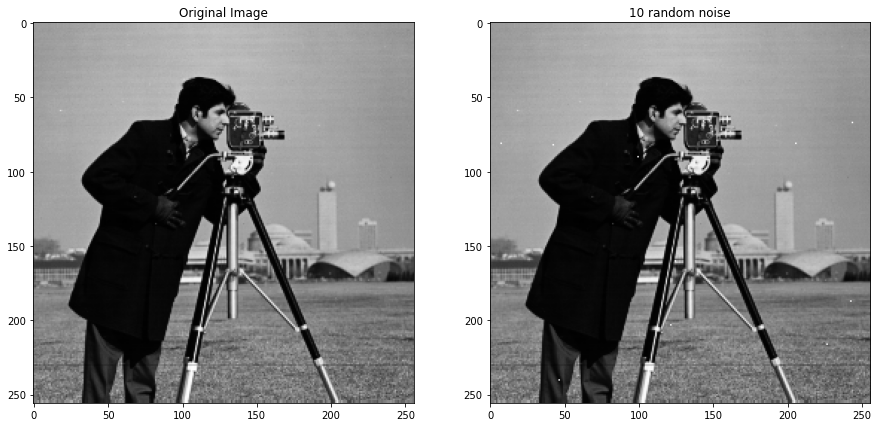

In [7]:
noise_10 = random_255(camera_man, 10)
print("MSE:")
print(MSE(camera_man, noise_10))
print("PSNR:")
print(PSNR(camera_man, noise_10))

_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(camera_man, cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(noise_10, cmap='gray')
subplt[1].set_title("10 random noise")
plt.show()

MSE:
1.0
PSNR:
110.82527090316852


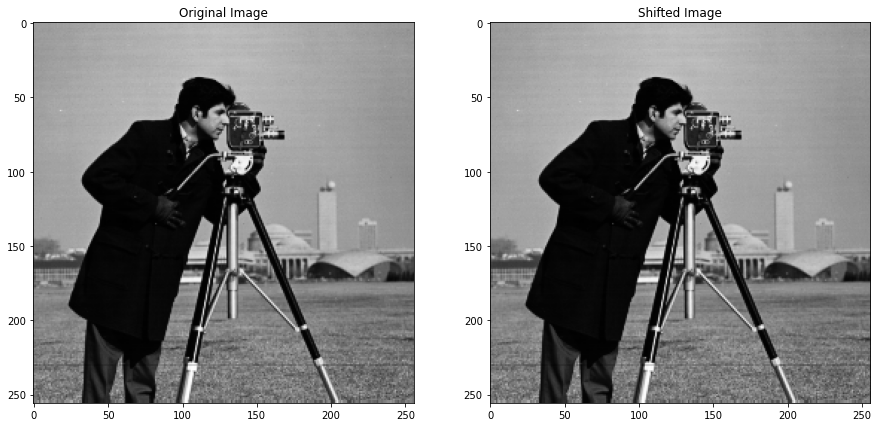

In [8]:
shift_1 = camera_man + 1
print("MSE:")
print(MSE(camera_man, shift_1))
print("PSNR:")
print(PSNR(camera_man, shift_1))

_, subplt = plt.subplots(1, 2, figsize=(fig_w, fig_h))
subplt[0].imshow(camera_man, cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(shift_1, cmap='gray')
subplt[1].set_title("Shifted Image")
plt.show()

مقادیر و معنای اعداد توابع در قسمت های بالایی توضیح داده شده. مورد قابل اشاره در این قسمت بالا رفتن مقدار ام اس ای با شیف دادن می باشد. با اینکه دو تصویر از لحاظ ساختاری بسیار شبیه به هم هستند اما مقدار گزارش شده چند ده برابر مقدار مشابه در تصویر با ده نویز سفید است